In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import os

In [2]:

# https://www.kaggle.com/datasets/ydalat/lifestyle-and-wellbeing-data?resource=download
PATH = os.path.join("data", "Wellbeing_and_lifestyle_data_Kaggle.csv")
df = pd.read_csv(PATH)
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [3]:
df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

**FRUITS_VEGGIES**: Number of fruits or vegetables ate every day.

**DAILY_STRESS**: Stress scale mean of the last 12 months.

**PLACES_VISITED**: Number of place visited in the last 12 months.

**CORE_CIRCLE**: Number of close friends.

**SUPPORTING_OTHERS**: Number of people helped to achieve a better life in the last 12 months.

**SOCIAL_NETWORK**: Number of people you have social interactions every day.

**ACHIEVEMENT**: Number of personal achievement.

**DONATION**: Number of time you donate time or money to good causes.

**BMI_RANGE**: Body mass index (1 = bellow 25%, 2 = above 25%)

**TODO_COMPLETED**: Scale of how well you complete weekly goals (work and personal)

**FLOW**: Number in hours of experienced flow in a typical day

**DAILY_STEPS***: Thousand steps, daily average over multiple days including work days and week-end.

**LIVE_VISION**: HOW MANY YEARS AHEAD IS YOUR LIFE VISION VERY CLEAR FOR?

**SLEEP_HOURS**: Number of sleep hours

**LOST_VACATION**: Unused vacation days, lost or carried forward into the following year. ►Or because of work stress during your vacation.

**DAILY_SHOUTING**: In a typical week. Expressing your negative emotions in an active or passive manner.

**SUFFICIENT_INCOME**: HOW SUFFICIENT IS YOUR INCOME TO COVER BASIC LIFE EXPENSES? 

PERSONAL_AWARDS: Significant public recognitions validating a personal level of expertise and engagement (diploma, degree, certificate, accreditation, award, prize, published book, presentation at major **conference**, medals, cups, titles)

**TIME_FOR_PASSION**: HOW MANY HOURS DO YOU SPEND EVERYDAY DOING WHAT YOU ARE PASSIONATE ABOUT? 

WEEKLY_MEDITATIO*: IN A TYPICAL WEEK, HOW MANY TIMES DO YOU HAVE THE OPPORTUNITY TO THINK ABOUT YOURSELF? (Include meditation, praying and relaxation activities such as fitness, walking in a park or lunch **breaks**.)

**AGE**

**GENDER**

**WORK_LIFE_BALANCE_SCORE**: SCORE CALCULATED BY AH.COM ALGORITHM AND REPORTED TO USER IN THE FIRST REPORT

* = lets see if this is categorical or numeric one

# Exploratory Analysis

In [4]:
df['BMI_RANGE'].value_counts()

1    9413
2    6559
Name: BMI_RANGE, dtype: int64

In [5]:
# Convert the BMI range to be 0 if bellow 25% else 1
df['BMI_RANGE'] = df['BMI_RANGE'].map(lambda x: x-1)
df['BMI_RANGE'].value_counts()

0    9413
1    6559
Name: BMI_RANGE, dtype: int64

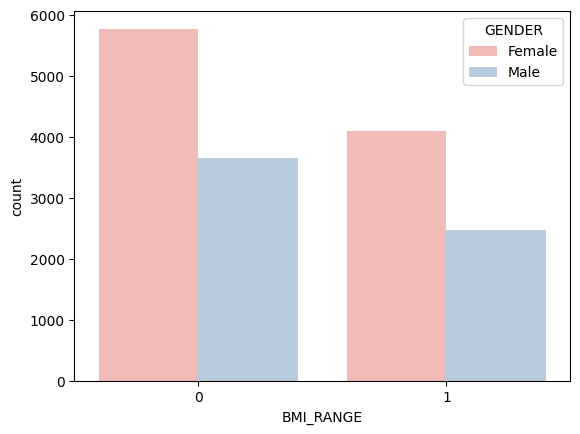

In [6]:
sns.countplot(data=df, x='BMI_RANGE', hue='GENDER', palette='Pastel1')
plt.show()

In [7]:
bellow_25, above_25 = df['BMI_RANGE'].value_counts()
above_proportion = above_25 / ( bellow_25 + above_25)
print(f'Proportion of people above 25% BMI in our dataset is {above_proportion*100:.2f}%')

f, m = df['GENDER'].value_counts()
f_proportion = f / (f + m)
print(f'Proportion of woman in our dataset is {f_proportion*100:.2f}%')

Proportion of people above 25% BMI in our dataset is 41.07%
Proportion of woman in our dataset is 61.72%


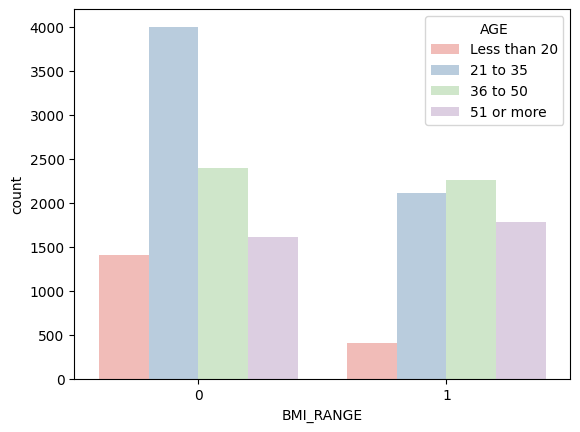

In [8]:
age_order = ['Less than 20', '21 to 35', '36 to 50', '51 or more']
sns.countplot(df, x='BMI_RANGE', hue='AGE', palette='Pastel1', hue_order=age_order)
plt.show()

# Modeling

In [9]:
from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [10]:
df['DAILY_STRESS'].value_counts()

3         4398
2         3407
4         2960
1         2478
5         2052
0          676
1/1/00       1
Name: DAILY_STRESS, dtype: int64

In [11]:
to_drop = df[df['DAILY_STRESS'] == '1/1/00'].index
df.drop(index=to_drop, inplace=True)
df.head()

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,0,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,1,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,1,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,1,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,1,...,7,0,0,2,8,1,5,51 or more,Female,663.9


In [12]:
cat_vars = ['DAILY_STEPS', 'DAILY_STRESS', 'TODO_COMPLETED', 'SUFFICIENT_INCOME', 'AGE', 'GENDER']
num_vars = ['FRUITS_VEGGIES', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'FLOW',
            'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 
            'WEEKLY_MEDITATION', 'WORK_LIFE_BALANCE_SCORE']
key_vars = 'Timestamp'
target = 'BMI_RANGE'

features = num_vars + cat_vars
X = df[features]
y = df[target]

In [13]:
# def map_columns_values(df, columns):
#     for col in columns:
#         new_values = df[col].map(lambda x: f'{col}_{x}').values.tolist()
#         df.loc[:, col] = new_values
#     return df

# X = map_columns_values(X.copy(), ['DAILY_STEPS', 'DAILY_STRESS', 'TODO_COMPLETED'])
# X.loc[:, 'SUFFICIENT_INCOME'] = X['SUFFICIENT_INCOME'].map(lambda x: x - 1)
# # X_partial = map_columns_values(X[cat_vars[:3]].copy())
# # X['SUFFICIENT_INCOME'] = X['SUFFICIENT_INCOME'].map(lambda x: x - 1)
# # X.loc[:, X_partial.columns.tolist()] = X_partial

In [14]:
# X[cat_vars]

In [15]:
cat_pipe = Pipeline(steps=[
    ('categorical_imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

num_pipe = Pipeline(steps=[
    ('numeric_imputer', SimpleImputer(strategy='median'))
])

processor = ColumnTransformer(
    transformers=[
        ("numeric", num_pipe, num_vars),
        ('categorical', cat_pipe, cat_vars)
    ], remainder='passthrough'
)

classifier = Pipeline(steps=[
    ('col_transf', processor),
    ('lgbm', LGBMClassifier(n_jobs=-1))
    ]
)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, stratify=y, random_state=42)

In [16]:
from sklearn.model_selection import cross_validate, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_results = cross_validate(
    classifier,
    X_train,
    y_train,
    scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
    cv=skf,
    n_jobs=-1
)
cv_results_df = pd.DataFrame(cv_results)
cv_results_df

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1,test_roc_auc
0,0.374421,0.079512,0.832551,0.828059,0.747619,0.785786,0.917880
1,0.345049,0.077353,0.829354,0.821616,0.746425,0.782218,0.915959
2,0.366219,0.084382,0.844227,0.856517,0.745472,0.797146,0.923964
3,0.348971,0.099562,0.848532,0.866150,0.746425,0.801843,0.925502
4,0.390239,0.081921,0.835225,0.829832,0.753098,0.789605,0.916554


In [17]:
print('Mean Results')
cv_results_df.mean()[2:]

Mean Results


test_accuracy     0.837978
test_precision    0.840435
test_recall       0.747808
test_f1           0.791320
test_roc_auc      0.919972
dtype: float64

In [18]:
classifier.fit(X_train, y_train)

Pipeline(steps=[('col_transf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('numeric',
                                                  Pipeline(steps=[('numeric_imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['FRUITS_VEGGIES',
                                                   'PLACES_VISITED',
                                                   'CORE_CIRCLE',
                                                   'SUPPORTING_OTHERS',
                                                   'SOCIAL_NETWORK',
                                                   'ACHIEVEMENT', 'DONATION',
                                                   'FLOW', 'LIVE_VISION',
                                                   'SLEEP_HOURS',
                                                   'LOST_VACATION',
                                                   'DAILY_SHOUTING',
                                                   'PE...
                                                   'TIME_FOR_PASSION',
                                                   'WEEKLY_MEDITATION',
                                                   'WORK_LIFE_BALANCE_SCORE']),
                                                 ('categorical',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['DAILY_STEPS',
                                                   'DAILY_STRESS',
                                                   'TODO_COMPLETED',
                                                   'SUFFICIENT_INCOME', 'AGE',
                                                   'GENDER'])])),
                ('lgbm', LGBMClassifier())])

In [19]:
predictions = classifier.predict(X_test)
standard_acc = np.mean(predictions==y_test)
print(f'Accuracy is equal to: {standard_acc:.2f}')

Accuracy is equal to: 0.84


In [20]:
from sklearn.model_selection import GridSearchCV

gridParams = {
    'lgbm__learning_rate': [0.005, 0.01, 0.1, 0.5],
    'lgbm__n_estimators': [24, 48, 72, 100],
    'lgbm__num_leaves': [12, 24, 31, 48], # large num_leaves helps improve accuracy but might lead to over-fitting
    'lgbm__boosting_type' : ['gbdt', 'dart'], # for better accuracy -> try dart
    'lgbm__objective' : ['binary'],
    'lgbm__max_bin':[255, 510, 765], # large max_bin helps improve accuracy but might slow down training progress
    'lgbm__random_state' : [42],
    'lgbm__colsample_bytree' : [.65, .8, 1],
    'lgbm__subsample' : [.7, .8, 1],
    'lgbm__reg_alpha' : [0, 1, 1.2],
    'lgbm__reg_lambda' : [0,1,1.2],
    }

grid = GridSearchCV(classifier, gridParams, verbose=1, cv=4)
grid.fit(X_train, y_train)

Fitting 4 folds for each of 31104 candidates, totalling 124416 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('col_transf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numeric',
                                                                         Pipeline(steps=[('numeric_imputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         ['FRUITS_VEGGIES',
                                                                          'PLACES_VISITED',
                                                                          'CORE_CIRCLE',
                                                                          'SUPPORTING_OTHERS',
                                                                          'SOCIAL_NETWORK',
                                                                          'ACHIEVEMENT',
                                                                          'DONATION',
                                                                          'FLOW',
                                                                          'LIVE_VISION',
                                                                          'SLEEP_HOURS',
                                                                          'LOST_VA...
             param_grid={'lgbm__boosting_type': ['gbdt', 'dart'],
                         'lgbm__colsample_bytree': [0.65, 0.8, 1],
                         'lgbm__learning_rate': [0.005, 0.01, 0.1, 0.5],
                         'lgbm__max_bin': [255, 510, 765],
                         'lgbm__n_estimators': [24, 48, 72, 100],
                         'lgbm__num_leaves': [12, 24, 31, 48],
                         'lgbm__objective': ['binary'],
                         'lgbm__random_state': [42],
                         'lgbm__reg_alpha': [0, 1, 1.2],
                         'lgbm__reg_lambda': [0, 1, 1.2],
                         'lgbm__subsample': [0.7, 0.8, 1]},
             verbose=1)

# TODO: COMPARAR MAIS METRICAS

In [21]:
best_model = grid.best_estimator_
best_model.fit(X_train, y_train)
pred = best_model.predict(X_test)
best_model_acc = np.mean(pred==y_test)
print(f'Best model accuracy is equal to: {best_model_acc:.2f}')

Best model accuracy is equal to: 0.95


In [22]:
import joblib

DIR_NAME = 'models'
MODEL_PATH = os.path.join(DIR_NAME, 'lgbm_model.pkl')

if not os.path.exists(DIR_NAME):
    os.makedirs(DIR_NAME)
    
joblib.dump(grid.best_estimator_, MODEL_PATH)

['models\\lgbm_model.pkl']

In [23]:
loaded_model = joblib.load(MODEL_PATH)

# Understand Model Decision

In [34]:
importances = loaded_model[-1].feature_importances_

new_cat_cols = loaded_model.named_steps["col_transf"]\
.named_transformers_['categorical'].named_steps['onehot']\
.get_feature_names_out(cat_vars)

all_cols = np.concatenate([num_vars, new_cat_cols])

feat_importances = pd.DataFrame(importances, index=all_cols)\
.reset_index().rename(columns={"index":"feature",0:"importance"})
feat_importances.sort_values(by='importance', ascending=False, inplace=True)
feat_importances.head(10)

,feature,importance
15,WORK_LIFE_BALANCE_SCORE,567
12,PERSONAL_AWARDS,110
3,SUPPORTING_OTHERS,108
8,LIVE_VISION,102
1,PLACES_VISITED,101
13,TIME_FOR_PASSION,100
5,ACHIEVEMENT,97
4,SOCIAL_NETWORK,93
6,DONATION,93
7,FLOW,93
